In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from mpl_toolkits.mplot3d import Axes3D

In [23]:
nx, ny = 40, 40
Lx, Ly = 1.0,1.0
Y, X = np.meshgrid(np.linspace(0,Ly,ny), np.linspace(0,Lx,nx))

In [24]:
def source(z):
    x, y = z[0], z[1]
    return 0.00*np.exp(-((x-0.5)**2 + (y-0.5)**2))
sourcev = np.vectorize(source)

In [25]:
top = np.ones(nx)
bottom = np.zeros(nx)
left = np.zeros(ny)
right = np.array([ -1.0 if 0.25 < x and x < 0.5 else 0.0 for x in np.linspace(0,Ly,ny)])

In [26]:
def harmonic(nx,ny,source,top,bottom,left,right):
    laplacian_matrix = np.zeros((nx*ny, nx*ny), dtype='float64')
    source_vector = np.zeros(nx*ny, dtype='float64')
    for i in range(0,ny):
        for j in range(0,nx):
            laplacian_matrix[i*nx + j,i*nx + j] = -4

            source_vector[i*nx + j] = source( np.array([(j/nx)*Lx, (i/ny)*Ly ]) )

            if j is (nx-1):
                source_vector[i*nx + j] -= right[i]
            else:
                laplacian_matrix[i*nx + j,i*nx + j+1] = 1.0

            if j is 0:
                source_vector[i*nx + j] -= left[i]
            else:
                laplacian_matrix[i*nx + j,i*nx + j-1] = 1.0

            if i is (ny-1):
                source_vector[i*nx + j] -= bottom[j]
            else:
                laplacian_matrix[i*nx + j,(i+1)*nx + j] = 1.0

            if i is 0:
                source_vector[i*nx + j] -= top[j]
            else:
                laplacian_matrix[i*nx + j,(i-1)*nx + j] = 1.0
    return solve(laplacian_matrix, source_vector).reshape((nx,ny))

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 12.2 µs


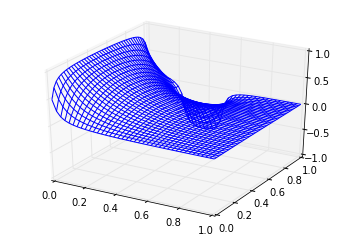

In [32]:
%time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, harmonic(nx,ny,source,top,bottom,left,right))

In [28]:
def perturbative_harmonic(nx,ny,source,top,bottom,left,right,speed,tol, candidate = np.zeros((nx,ny))):
    
    acceptable = False
    while not acceptable:
        error = 0.0
        clone = candidate.copy()
        
        for i in range(0,ny):
            for j in range(0,nx):
                average = 0.0
                if j is 0:
                    average += left[i]
                else:
                    average += clone[i,j-1]
                if j is nx-1:
                    average += right[i]
                else:
                    average += clone[i,j+1]
                if i is 0:
                    average += bottom[j]
                else:
                    average += clone[i-1,j]
                if i is ny-1:
                    average += top[j]
                else:
                    average += clone[i+1,j]
                difference = average - 4*candidate[i,j]
                error += np.abs(difference)
                candidate[i,j] += speed*difference
        
        acceptable = (error < tol)
    
    return candidate

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11 µs


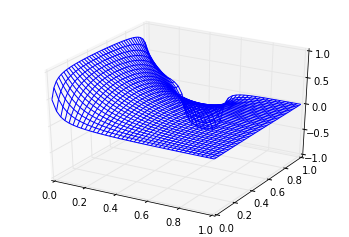

In [30]:
%time
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, perturbative_harmonic(nx,ny,source,bottom,top,left,right,0.1,0.1))

In [36]:
%time perturbative_harmonic(nx,ny,source,np.linspace(0,1,nx),np.ones(nx),np.zeros(ny),np.zeros(ny),0.1,0.1)

CPU times: user 16.3 s, sys: 76 ms, total: 16.4 s
Wall time: 16.3 s


array([[ 0.49957325,  0.69679593,  0.78931746, ...,  0.78948787,
         0.69691183,  0.49963189],
       [ 0.30149786,  0.49829463,  0.6207117 , ...,  0.6210566 ,
         0.49852921,  0.30161656],
       [ 0.20812516,  0.37417621,  0.49616915, ...,  0.49669688,
         0.37453515,  0.20830678],
       ..., 
       [ 0.01908955,  0.03923871,  0.06047915, ...,  0.4440583 ,
         0.3405479 ,  0.19185031],
       [ 0.01708817,  0.03684818,  0.05848975, ...,  0.56776493,
         0.4651626 ,  0.28627404],
       [ 0.01241673,  0.03257963,  0.05541438, ...,  0.73666385,
         0.66606717,  0.48808507]])